In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
import numpy as np
import handcalcs.render

In [2]:
# Color 0: blue, 1:Green, 2: Red
# Gender 0 Male, 1 Female


data = pd.DataFrame({'like Popcorn': [True, True, False,True,False,False],
                    'Ages':[12,87,44,19,32,14],
                    'Favorite Color':[0,1,0,2,1,0],
                     'Love Trolls2':[True,True,False, False,True, True]
                    })

data['Residual1'] = data['Love Trolls2'] - np.log(4/2)
data

,like Popcorn,Ages,Favorite Color,Love Trolls2,Residual1
0,True,12,0,True,0.306853
1,True,87,1,True,0.306853
2,False,44,0,False,-0.693147
3,True,19,2,False,-0.693147
4,False,32,1,True,0.306853
5,False,14,0,True,0.306853


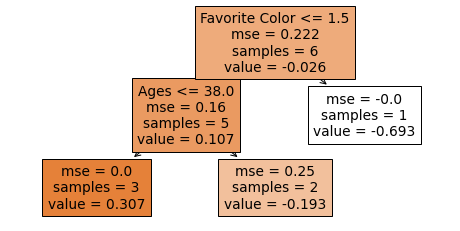

In [87]:
data =data.sort_values(by = ['like Popcorn', 'Ages', 'Favorite Color'])
X,y = data[['like Popcorn', 'Ages', 'Favorite Color']], data['Residual1'] 
tree1 = DecisionTreeRegressor(max_depth=2)
tree1 = tree1.fit(X, y)

fig = plt.figure(figsize=(8,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [67]:
residual = tree1.predict(X)[data['Favorite Color'] == 2]
proba = 0.7*(np.ones(1) - 0.7)

In [68]:
%%render
residual = sum(residual) # total residaul 
output1 = residual/(proba) # output value

<IPython.core.display.Latex object>

In [69]:
residual = tree1.predict(X)[(data['Favorite Color'].values != 2) &  (data['Ages'].values > 37)]
proba = 0.7*(np.ones(2) - 0.7)

In [70]:
%%render
residual = sum(residual) # total residaul 
output2 = residual/sum(proba) # output value

<IPython.core.display.Latex object>

In [71]:
residual = tree1.predict(X)[(data['Favorite Color'].values != 2) &  (data['Ages'].values < 37)]
proba = 0.7*(np.ones(3) - 0.7)

In [72]:
%%render
residual = sum(residual) # total residaul 
output3 = residual/sum(proba) # output value

<IPython.core.display.Latex object>

In [73]:
learning_rate = 0.8
proba1 = np.exp(np.log(4/2) + 0.8 * output1)/(1+np.exp(np.log(4/2) + 0.8 * output1))
proba2 = np.exp(np.log(4/2) + 0.8 * output2)/(1+np.exp(np.log(4/2) + 0.8 * output2))
proba3 = np.exp(np.log(4/2) + 0.8 * output3)/(1+np.exp(np.log(4/2) + 0.8 * output3))

print(proba1, proba2, proba3)

[0.12483566] 0.48933871553408437 0.8655427313885561


In [74]:
data['new prediction'] = 0
data['new prediction'].loc[data['Favorite Color'] == 2] = proba1
data['new prediction'].loc[(data['Favorite Color'].values != 2) &  (data['Ages'].values > 37)] = proba2
data['new prediction'].loc[(data['Favorite Color'].values != 2) &  (data['Ages'].values < 37)] = proba3
data

c:\users\tomzz\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,like Popcorn,Ages,Favorite Color,Love Trolls2,Residual1,new prediction,Residual2
5,False,14,0,True,0.306853,0.865543,0.134457
4,False,32,1,True,0.306853,0.865543,0.134457
2,False,44,0,False,-0.693147,0.489339,-0.489339
0,True,12,0,True,0.306853,0.865543,0.134457
3,True,19,2,False,-0.693147,0.124836,-0.124836
1,True,87,1,True,0.306853,0.489339,0.510661


In [75]:
data['Residual2'] = data['Love Trolls2'] - data['new prediction']
data

,like Popcorn,Ages,Favorite Color,Love Trolls2,Residual1,new prediction,Residual2
5,False,14,0,True,0.306853,0.865543,0.134457
4,False,32,1,True,0.306853,0.865543,0.134457
2,False,44,0,False,-0.693147,0.489339,-0.489339
0,True,12,0,True,0.306853,0.865543,0.134457
3,True,19,2,False,-0.693147,0.124836,-0.124836
1,True,87,1,True,0.306853,0.489339,0.510661


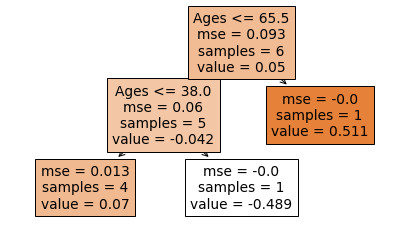

In [76]:
#data =data.sort_values(by = ['Favorite Color','Ages'])
X,y = data[['like Popcorn', 'Ages', 'Favorite Color']], data['Residual2'] 
tree2 = DecisionTreeRegressor(max_depth=2)
tree2 = tree1.fit(X, y)

fig = plt.figure(figsize=(7,4))
_ = tree.plot_tree(tree1, feature_names = X.columns, filled = True)

In [77]:
residual = tree2.predict(X)[data['Ages'] > 65]
proba = data['new prediction'].loc[data['Ages'] > 65] * \
        (np.ones(1) - data['new prediction'].loc[data['Ages'] > 65])

In [78]:
%%render
residual = sum(residual) # total residaul 
output1 = residual/sum(proba) # output value

<IPython.core.display.Latex object>

In [79]:
residual = tree2.predict(X)[[data['Ages'] <= 38]]
proba = data['new prediction'].loc[data['Ages'] <= 38] * \
        (np.ones(4) - data['new prediction'].loc[data['Ages'] <= 38])

c:\users\tomzz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [80]:
%%render
residual = sum(residual) # total residaul 
output2 = residual/sum(proba) # output value

<IPython.core.display.Latex object>

In [81]:
residual = tree2.predict(X)[[(data['Ages'] > 38) & (data['Ages'] < 65) ]]
proba = data['new prediction'].loc[(data['Ages'] > 38) & (data['Ages'] < 65)] * \
        (np.ones(1) - data['new prediction'].loc[(data['Ages'] > 38) & (data['Ages'] < 65)])

c:\users\tomzz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [82]:
%%render
residual = sum(residual) # total residaul 
output3 = residual/sum(proba) # output value

<IPython.core.display.Latex object>

In [83]:
# using the new prediction, the residual is smaller than before,
# we take another step toward right direction, 
# We build another tree based on the residual, and predict those residual on the next tree
# we repeat the process until we reach the maximum numbers of trees or residual is small enough


In [120]:
# Let us try just one example

temp = data.iloc[:,0:3].append(pd.Series([True,25,1], index = X.columns[:3]),ignore_index=True)
temp.iloc[[6]]

,like Popcorn,Ages,Favorite Color
6,True,25,1


In [125]:
out1 =  float(tree1.predict(temp.iloc[[6]])/(np.log(4/2) *(1-np.log(4/2))))

prob1 = np.exp(np.log(4/2) + 0.8 * out1)/(1+np.exp(np.log(4/2) + 0.8 * out1))

print('The output value from tree1',out1, '\n')

print('The probability from tree1',prob1, '\n')

out2 =  float(tree2.predict(temp.iloc[[6]])/(prob1 *(1-prob1)))

print('The output value from tree2',out2)

The output value from tree1 1.4426950408889634 

The probability from tree1 0.8638101583039105 

The output value from tree2 0.591913907245472


In [128]:
%%render
final  = np.log(4/2) + learning_rate * out1 + learning_rate *out2

probability = np.exp(final)/(1+np.exp(final))

<IPython.core.display.Latex object>